In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn as imblearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv("C:\\Users\\SAURAV\\OneDrive\\Documents\\PGP-DSBA\\Capstone\\P2P Lending\\New Data\\Python Code\\clean_data.csv")

In [3]:
test_data=pd.read_csv("C:\\Users\\SAURAV\\OneDrive\\Documents\\PGP-DSBA\\Capstone\\P2P Lending\\New Data\\Python Code\\validation_data.csv")

In [4]:
train_data.shape

(883760, 21)

In [5]:
test_data.shape

(791870, 21)

In [6]:
test_data.head()

,Unnamed: 0,loan_amnt,term,installment,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,...,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,loan_age,fico_value
0,0,24000,60,533.75,MORTGAGE,105000.0,Source Verified,Fully Paid,debt_consolidation,WA,...,0,14,0,12028,22,w,Individual,2,1825,662.0
1,1,10000,36,306.45,RENT,65000.0,Source Verified,Fully Paid,debt_consolidation,CA,...,4,5,0,5667,28,w,Individual,3,1825,682.0
2,2,8000,36,245.16,OWN,38000.0,Not Verified,Fully Paid,credit_card,NC,...,0,9,0,10082,24,w,Individual,0,1825,687.0
3,3,30000,60,659.33,MORTGAGE,72000.0,Source Verified,Fully Paid,debt_consolidation,OH,...,0,13,0,23034,42,w,Individual,3,1825,702.0
4,5,19600,60,527.50,RENT,75000.0,Source Verified,Charged Off,debt_consolidation,PA,...,0,7,0,1584,15,w,Individual,0,1825,702.0


In [7]:
#drop open_acc column since it has high correlation with total_acc 0.69%
train_data.drop(['open_acc'], axis=1,inplace=True)
test_data.drop(['open_acc'], axis=1,inplace=True)

In [8]:
train_data.drop(['Unnamed: 0'], axis=1,inplace=True)
test_data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [9]:
rows = train_data.shape[0] 
cols = train_data.shape[1] 

In [10]:
# remove home_ownership from test and train data
# train_data.drop(['home_ownership'], axis=1,inplace=True)
# test_data.drop(['home_ownership'], axis=1,inplace=True)

In [11]:
train_data['loan_status'] = train_data['loan_status'].str.replace('Fully Paid','0')
train_data['loan_status'] = train_data['loan_status'].str.replace('Charged Off','1')
train_data['loan_status']=train_data['loan_status'].astype(int)

In [12]:
test_data['loan_status'] = test_data['loan_status'].str.replace('Fully Paid','0')
test_data['loan_status'] = test_data['loan_status'].str.replace('Charged Off','1')
test_data['loan_status']=test_data['loan_status'].astype(int)

In [13]:
address=pd.DataFrame(train_data['addr_state'].value_counts())

In [14]:

one_hot_train=pd.get_dummies(train_data, columns=["verification_status", "purpose","addr_state","application_type","initial_list_status","home_ownership"], 
                             prefix=["verification_status.", "purpose.","addr_state.","application_type.","initial_list_status.","home_ownership."])

In [15]:

one_hot_test=pd.get_dummies(test_data, columns=["verification_status", "purpose","addr_state","application_type","initial_list_status","home_ownership"], prefix=[
    "verification_status.", "purpose.","addr_state.","application_type.","initial_list_status.","home_ownership."])

In [16]:
one_hot_train['addr_state.west'] =sum([one_hot_train['addr_state._CA'],
                                       one_hot_train['addr_state._AZ'],
                                       one_hot_train['addr_state._WA'],
                                       one_hot_train['addr_state._CO'],
                                       one_hot_train['addr_state._NV'],
                                       one_hot_train['addr_state._OR'],
                                       one_hot_train['addr_state._UT'],
                                       one_hot_train['addr_state._NM'],
                                       one_hot_train['addr_state._HI'],
                                       one_hot_train['addr_state._FL'],
                                       one_hot_train['addr_state._AK'],
                                       one_hot_train['addr_state._WY'],
                                       one_hot_train['addr_state._ID']
                                     ])
one_hot_train['addr_state.Mid_West'] =sum([one_hot_train['addr_state._IL'],
                                            one_hot_train['addr_state._OH'],
                                            one_hot_train['addr_state._MI'],
                                            one_hot_train['addr_state._MN'],
                                            one_hot_train['addr_state._MO'],
                                            one_hot_train['addr_state._IN'],
                                            one_hot_train['addr_state._WI'],
                                            one_hot_train['addr_state._KS'],
                                            one_hot_train['addr_state._SD'],
                                            one_hot_train['addr_state._NE'],
                                            one_hot_train['addr_state._ND'],
                                            one_hot_train['addr_state._IA']
                                    ])
one_hot_train['addr_state.North_East'] =sum([one_hot_train['addr_state._NY'],
                                            one_hot_train['addr_state._NJ'],
                                            one_hot_train['addr_state._PA'],
                                            one_hot_train['addr_state._MA'],
                                            one_hot_train['addr_state._CT'],
                                            one_hot_train['addr_state._NH'],
                                            one_hot_train['addr_state._RI'],
                                            one_hot_train['addr_state._DE'],
                                            one_hot_train['addr_state._DC'],
                                            one_hot_train['addr_state._VT'],
                                            one_hot_train['addr_state._ME']
                                               ])
one_hot_train['addr_state.South'] =sum([one_hot_train['addr_state._TX'],
                                            one_hot_train['addr_state._FL'],
                                            one_hot_train['addr_state._GA'],
                                            one_hot_train['addr_state._VA'],
                                            one_hot_train['addr_state._NC'],
                                            one_hot_train['addr_state._MD'],
                                            one_hot_train['addr_state._TN'],
                                            one_hot_train['addr_state._AL'],
                                            one_hot_train['addr_state._SC'],
                                            one_hot_train['addr_state._LA'],
                                            one_hot_train['addr_state._KY'],
                                            one_hot_train['addr_state._OK'],
                                            one_hot_train['addr_state._AR'],
                                            one_hot_train['addr_state._WV'],
                                            one_hot_train['addr_state._MS']  
                                            ])


In [17]:
one_hot_train.drop(['addr_state._AK','addr_state._AL','addr_state._AR','addr_state._AZ','addr_state._CO','addr_state._CT',
'addr_state._DC','addr_state._DE','addr_state._FL','addr_state._GA','addr_state._HI','addr_state._IA','addr_state._ID',
'addr_state._IL','addr_state._IN','addr_state._KS','addr_state._KY','addr_state._LA','addr_state._MA','addr_state._MD',
'addr_state._ME','addr_state._MI','addr_state._MN','addr_state._MO','addr_state._MS','addr_state._MT','addr_state._NC',
'addr_state._ND','addr_state._NE','addr_state._NH','addr_state._NJ','addr_state._NM','addr_state._NV','addr_state._NY',
'addr_state._OH','addr_state._OK','addr_state._OR','addr_state._PA','addr_state._RI','addr_state._SC','addr_state._SD',
'addr_state._TN','addr_state._TX','addr_state._UT','addr_state._VA','addr_state._VT','addr_state._WA','addr_state._WI',
'addr_state._WV','addr_state._WY','addr_state._CA'], axis=1,inplace=True)

In [18]:
one_hot_test['addr_state.west'] =sum([one_hot_test['addr_state._CA'],
                                       one_hot_test['addr_state._AZ'],
                                       one_hot_test['addr_state._WA'],
                                       one_hot_test['addr_state._CO'],
                                       one_hot_test['addr_state._NV'],
                                       one_hot_test['addr_state._OR'],
                                       one_hot_test['addr_state._UT'],
                                       one_hot_test['addr_state._NM'],
                                       one_hot_test['addr_state._HI'],
                                       one_hot_test['addr_state._FL'],
                                       one_hot_test['addr_state._AK'],
                                       one_hot_test['addr_state._WY'],
                                       one_hot_test['addr_state._ID']
                                     ])
one_hot_test['addr_state.Mid_West'] =sum([one_hot_test['addr_state._IL'],
                                            one_hot_test['addr_state._OH'],
                                            one_hot_test['addr_state._MI'],
                                            one_hot_test['addr_state._MN'],
                                            one_hot_test['addr_state._MO'],
                                            one_hot_test['addr_state._IN'],
                                            one_hot_test['addr_state._WI'],
                                            one_hot_test['addr_state._KS'],
                                            one_hot_test['addr_state._SD'],
                                            one_hot_test['addr_state._NE'],
                                            one_hot_test['addr_state._ND']
                                           # one_hot_test['addr_state._IA']
                                    ])
one_hot_test['addr_state.North_East'] =sum([one_hot_test['addr_state._NY'],
                                            one_hot_test['addr_state._NJ'],
                                            one_hot_test['addr_state._PA'],
                                            one_hot_test['addr_state._MA'],
                                            one_hot_test['addr_state._CT'],
                                            one_hot_test['addr_state._NH'],
                                            one_hot_test['addr_state._RI'],
                                            one_hot_test['addr_state._DE'],
                                            one_hot_test['addr_state._DC'],
                                            one_hot_test['addr_state._VT'],
                                            one_hot_test['addr_state._ME']
                                               ])
one_hot_test['addr_state.South'] =sum([one_hot_test['addr_state._TX'],
                                            one_hot_test['addr_state._FL'],
                                            one_hot_test['addr_state._GA'],
                                            one_hot_test['addr_state._VA'],
                                            one_hot_test['addr_state._NC'],
                                            one_hot_test['addr_state._MD'],
                                            one_hot_test['addr_state._TN'],
                                            one_hot_test['addr_state._AL'],
                                            one_hot_test['addr_state._SC'],
                                            one_hot_test['addr_state._LA'],
                                            one_hot_test['addr_state._KY'],
                                            one_hot_test['addr_state._OK'],
                                            one_hot_test['addr_state._AR'],
                                            one_hot_test['addr_state._WV'],
                                            one_hot_test['addr_state._MS']  
                                            ])


In [19]:
one_hot_test.drop(['addr_state._AK','addr_state._AL','addr_state._AR','addr_state._AZ','addr_state._CO','addr_state._CT',
'addr_state._DC','addr_state._DE','addr_state._FL','addr_state._GA','addr_state._HI','addr_state._ID',
'addr_state._IL','addr_state._IN','addr_state._KS','addr_state._KY','addr_state._LA','addr_state._MA',
'addr_state._MD','addr_state._ME','addr_state._MI','addr_state._MN','addr_state._MO','addr_state._MS',
'addr_state._MT','addr_state._NC','addr_state._ND','addr_state._NE','addr_state._NH','addr_state._NJ',
'addr_state._NM','addr_state._NV','addr_state._NY','addr_state._OH','addr_state._OK','addr_state._OR',
'addr_state._PA','addr_state._RI','addr_state._SC','addr_state._SD','addr_state._TN','addr_state._TX',
'addr_state._UT','addr_state._VA','addr_state._VT','addr_state._WA','addr_state._WI','addr_state._WV',
'addr_state._WY','addr_state._CA'], axis=1,inplace=True)

In [20]:
one_hot_test.shape

(791870, 43)

In [21]:
x_train=one_hot_train.drop(['loan_status'],axis=1) 
y_train=one_hot_train.loan_status

In [22]:
x_test=one_hot_test.drop(['loan_status'],axis=1) 
y_test=one_hot_test.loan_status

In [23]:
#compare train and test column names
a = np.intersect1d(x_train.columns, x_test.columns)
#print (a)
b=x_train.columns
#print(b)
c=np.array(b)
#type(c)
print(np.setdiff1d(c,a))

['home_ownership._OTHER']


In [24]:
#it seems home_ownership._OTHER column is missing into test data so create it
x_test['home_ownership._OTHER']=0

In [25]:
x_train.dtypes

loan_amnt                               float64
term                                      int64
installment                             float64
annual_inc                              float64
dti                                     float64
delinq_2yrs                             float64
pub_rec                                 float64
revol_bal                               float64
total_acc                               float64
mort_acc                                float64
loan_age                                  int64
fico_value                              float64
verification_status._Not Verified         uint8
verification_status._Source Verified      uint8
verification_status._Verified             uint8
purpose._car                              uint8
purpose._credit_card                      uint8
purpose._debt_consolidation               uint8
purpose._educational                      uint8
purpose._home_improvement                 uint8
purpose._house                          

In [26]:
#get feature importance
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=18)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, random_state=15)

In [27]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [28]:
pd.set_option('display.max_rows', feature_importances.shape[0]+1)
print(feature_importances)

                                      importance
dti                                     0.126007
revol_bal                               0.121460
installment                             0.115129
annual_inc                              0.092161
fico_value                              0.090532
term                                    0.089729
total_acc                               0.073116
loan_age                                0.069107
loan_amnt                               0.058325
mort_acc                                0.033003
delinq_2yrs                             0.012968
pub_rec                                 0.009415
home_ownership._MORTGAGE                0.007676
addr_state.west                         0.007582
addr_state.South                        0.007388
addr_state.North_East                   0.007332
verification_status._Verified           0.007253
purpose._credit_card                    0.007093
home_ownership._RENT                    0.006779
purpose._debt_consol

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [30]:

# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [31]:
x_train.shape

(883760, 43)

In [32]:
x_test.shape

(791870, 43)

In [33]:
y_test.shape

(791870,)

In [34]:
y_test.head()

0    0
1    0
2    0
3    0
4    1
Name: loan_status, dtype: int32

In [35]:
#get feature importance
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=18)
dt.fit(x_smote,y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=18, random_state=15)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[579692  62178]
 [126925  23075]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86    641870
           1       0.27      0.15      0.20    150000

    accuracy                           0.76    791870
   macro avg       0.55      0.53      0.53    791870
weighted avg       0.72      0.76      0.73    791870



[Text(0, 0.5, 'Default'), Text(0, 1.5, 'No Default')]

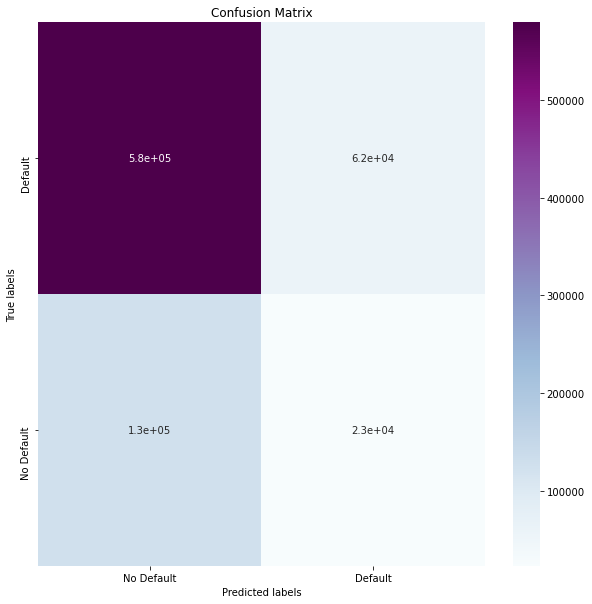

In [37]:
import seaborn as sns
labels = ['No Default', 'Default']
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="BuPu"); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Default', 'Default']); ax.yaxis.set_ticklabels(['Default', 'No Default'])

In [38]:
#save model
import pickle
Pkl_Filename = "C:\\Users\\SAURAV\\OneDrive\\Documents\\PGP-DSBA\\Capstone\\P2P Lending\\New Data\\Python Code\\DecisionTree.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(dt, file)

In [39]:
pred1 = dt.predict_proba(x_test)

(-0.05, 1.03)

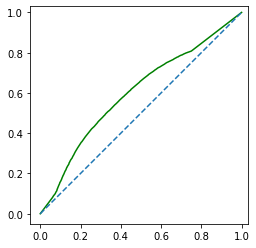

In [40]:
#ROC Curv
fpr, tpr, threshold= metrics.roc_curve(y_test, pred1[:,1]) 
plt.plot(fpr, tpr, label='ROC curve', color='g')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axes().set_aspect('equal')
plt.xlim([-0.05, 1.03])
plt.ylim([-0.05, 1.03])

In [41]:
AUC= metrics.auc(fpr,tpr) # to get the area under the Curve
print (AUC*100)

59.97666053769974


In [48]:
#test for changing cut off
x=[]
for i in range(len(pred1[:,1])):
    if (pred1[:,1][i]>=0.45):
        x.append(1)
    else:
        x.append(0)
x=np.array(x)
pd.crosstab(y_test,x)

col_0,0,1
loan_status,,
0,574179,67691
1,124514,25486


In [49]:
confusion = metrics.confusion_matrix(y_test,x )
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[574179  67691]
 [124514  25486]]


In [50]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
sensitivity=TP / float(TP+FN)
specificity=TN / float(TN+FP)
print('Accuracy='+ str(accuracy)) 
print('sensitivity='+str(sensitivity))
print('specificity='+str(specificity))

Accuracy=0.7572770783083081
sensitivity=0.16990666666666668
specificity=0.8945409506597909
